In [207]:
import psycopg2 as psql2
import boto3
import sqlalchemy
import pandas as pd
import numpy as np
#import sklearn
from datetime import datetime
#from scipy import stats
import sys
import matplotlib.pyplot as plt
#matplotlib inline
import get_connected

In [86]:
#dependents = pd.read_sql_query('''select distinct symbol from raw_all_trades_dependents order by symbol asc;''', cnx)

In [87]:
data = pd.read_sql_query('''select * from (select date_time as dep_date_time, trade_price_open as dep_trade_price_open, trade_price_close as dep_trade_price_close, volume as dep_volume, symbol as dep_sym, predictor as dep_pred, industry from raw_all_trades_dependents) a LEFT JOIN (select date_time as pred_date_time, trade_price_open as pred_trade_price_open, trade_price_close as pred_trade_price_close, volume as pred_volume, symbol as pred_sym from raw_all_trades_predictors) b ON a.dep_pred = b.pred_sym and a.dep_date_time = b.pred_date_time where not a.dep_sym isnull and not b.pred_sym isnull order by a.dep_sym, a.dep_date_time asc;''', cnx)

In [88]:
data.tail()

,dep_date_time,dep_trade_price_open,dep_trade_price_close,dep_volume,dep_sym,dep_pred,industry,pred_date_time,pred_trade_price_open,pred_trade_price_close,pred_volume,pred_sym
380666,2019-05-31 15:55:00,59.45,59.47,300.0,WPP US Equity,Z M9 Index,Advertising,2019-05-31 15:55:00,7138.5,7138.0,119.0,Z M9 Index
380667,2019-05-31 15:56:00,59.45,59.44,1262.0,WPP US Equity,Z M9 Index,Advertising,2019-05-31 15:56:00,7138.0,7136.0,43.0,Z M9 Index
380668,2019-05-31 15:57:00,59.49,59.49,100.0,WPP US Equity,Z M9 Index,Advertising,2019-05-31 15:57:00,7136.5,7139.5,55.0,Z M9 Index
380669,2019-05-31 15:58:00,59.48,59.49,300.0,WPP US Equity,Z M9 Index,Advertising,2019-05-31 15:58:00,7139.5,7141.0,90.0,Z M9 Index
380670,2019-05-31 15:59:00,59.49,59.52,3199.0,WPP US Equity,Z M9 Index,Advertising,2019-05-31 15:59:00,7141.0,7144.0,239.0,Z M9 Index


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380671 entries, 0 to 380670
Data columns (total 12 columns):
dep_date_time             380671 non-null datetime64[ns]
dep_trade_price_open      380671 non-null float64
dep_trade_price_close     380671 non-null float64
dep_volume                380671 non-null float64
dep_sym                   380671 non-null object
dep_pred                  380671 non-null object
industry                  380671 non-null object
pred_date_time            380671 non-null datetime64[ns]
pred_trade_price_open     380671 non-null float64
pred_trade_price_close    380671 non-null float64
pred_volume               380671 non-null float64
pred_sym                  380671 non-null object
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 34.9+ MB


In [74]:
#dependents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 1 columns):
symbol    133 non-null object
dtypes: object(1)
memory usage: 1.1+ KB


In [131]:
sym_dict = {elem: data for elem in dependents}
dependents = data.dep_sym.unique()

for key in sym_dict.keys():
    sym_dict[key] = data[:][data.dep_sym == key]

In [134]:
sym_dict['ABB US Equity']

,dep_date_time,dep_trade_price_open,dep_trade_price_close,dep_volume,dep_sym,dep_pred,industry,pred_date_time,pred_trade_price_open,pred_trade_price_close,pred_volume,pred_sym
0,2019-05-13 09:30:00,18.7700,18.8000,33559.0,ABB US Equity,SMM9 Index,,2019-05-13 09:30:00,9323.0,9331.0,212.0,SMM9 Index
1,2019-05-13 09:31:00,18.7950,18.7900,27979.0,ABB US Equity,SMM9 Index,,2019-05-13 09:31:00,9331.0,9330.0,53.0,SMM9 Index
2,2019-05-13 09:32:00,18.7900,18.7800,3200.0,ABB US Equity,SMM9 Index,,2019-05-13 09:32:00,9330.0,9322.0,75.0,SMM9 Index
3,2019-05-13 09:33:00,18.7800,18.7798,1774.0,ABB US Equity,SMM9 Index,,2019-05-13 09:33:00,9322.0,9323.0,77.0,SMM9 Index
4,2019-05-13 09:34:00,18.7800,18.7900,1046.0,ABB US Equity,SMM9 Index,,2019-05-13 09:34:00,9322.0,9328.0,84.0,SMM9 Index
5,2019-05-13 09:35:00,18.7800,18.7900,3083.0,ABB US Equity,SMM9 Index,,2019-05-13 09:35:00,9328.0,9329.0,75.0,SMM9 Index
6,2019-05-13 09:36:00,18.7800,18.7800,4664.0,ABB US Equity,SMM9 Index,,2019-05-13 09:36:00,9329.0,9328.0,108.0,SMM9 Index
7,2019-05-13 09:37:00,18.7800,18.7800,400.0,ABB US Equity,SMM9 Index,,2019-05-13 09:37:00,9328.0,9328.0,59.0,SMM9 Index
8,2019-05-13 09:38:00,18.7750,18.7900,6259.0,ABB US Equity,SMM9 Index,,2019-05-13 09:38:00,9330.0,9334.0,145.0,SMM9 Index
9,2019-05-13 09:39:00,18.7900,18.7900,2468.0,ABB US Equity,SMM9 Index,,2019-05-13 09:39:00,9333.0,9336.0,111.0,SMM9 Index


In [139]:
sym_dict.keys()

dict_keys(['ABB US Equity', 'AER US Equity', 'AUO US Equity', 'AZN US Equity', 'BBVA US Equity', 'BCS US Equity', 'BHP US Equity', 'BP US Equity', 'BTI US Equity', 'BUD US Equity', 'CAJ US Equity', 'CHT US Equity', 'CNHI US Equity', 'CRH US Equity', 'CS US Equity', 'CUK US Equity', 'DEO US Equity', 'E US Equity', 'EURN US Equity', 'FMS US Equity', 'FRO US Equity', 'GFI US Equity', 'GSK US Equity', 'HMC US Equity', 'HMY US Equity', 'IGT US Equity', 'IHG US Equity', 'INFY US Equity', 'ING US Equity', 'JHG US Equity', 'KB US Equity', 'KEP US Equity', 'LIQT US Equity', 'LPG US Equity', 'LPL US Equity', 'LXFT US Equity', 'LYG US Equity', 'MBT US Equity', 'MFG US Equity', 'NGG US Equity', 'NMR US Equity', 'NOK US Equity', 'NOMD US Equity', 'NSPR US Equity', 'NVO US Equity', 'NVS US Equity', 'ORAN US Equity', 'PHG US Equity', 'PHI US Equity', 'PKX US Equity', 'PSO US Equity', 'PUK US Equity', 'QGEN US Equity', 'RACE US Equity', 'RBS US Equity', 'RCL US Equity', 'RELX US Equity', 'RIG US Equit

In [176]:
#by_sym = data.groupby('dep_sym')
for key in sym_dict.items():
    x = data[data.dep_sym == key]['pred_trade_price_close'] #data[:][data.dep_sym == key]
    y = data[data.dep_sym == key]['dep_trade_price_close']
    

In [177]:
sym_dict.items()

dict_items([('ABB US Equity',            dep_date_time  dep_trade_price_open  dep_trade_price_close  \
0    2019-05-13 09:30:00               18.7700                18.8000   
1    2019-05-13 09:31:00               18.7950                18.7900   
2    2019-05-13 09:32:00               18.7900                18.7800   
3    2019-05-13 09:33:00               18.7800                18.7798   
4    2019-05-13 09:34:00               18.7800                18.7900   
5    2019-05-13 09:35:00               18.7800                18.7900   
6    2019-05-13 09:36:00               18.7800                18.7800   
7    2019-05-13 09:37:00               18.7800                18.7800   
8    2019-05-13 09:38:00               18.7750                18.7900   
9    2019-05-13 09:39:00               18.7900                18.7900   
10   2019-05-13 09:40:00               18.8000                18.8000   
11   2019-05-13 09:41:00               18.8000                18.8050   
12   2019-05-13 09:42

In [181]:
x

Series([], Name: pred_trade_price_close, dtype: int64)

In [201]:
for key in sym_dict.items():
    x = data[data.dep_sym == key]['pred_trade_price_close'] #data[:][data.dep_sym == key]
    y = data[data.dep_sym == key]['dep_trade_price_close']
    xmean = x.apply(lambda a: np.mean())
    ymean = y.apply(lambda a: np.mean())
    
x = x.apply(lambda a: np.array().reshape(-1,1))
y = y.apply(lambda a: np.array().reshape(-1,1))
#plt.scatter(x,y);
#pd.DataFrame['xycov'] = (['x'] - xmean) * (['y'] - ymean)

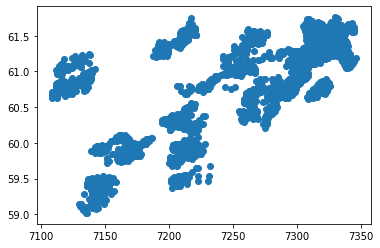

In [154]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y);

In [ ]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

#xycov = (x - xmean) * (y - ymean)
#xvar = (x)

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

In [112]:
y.head()

0         18.8000
1         18.7900
2         18.7800
3         18.7798
4         18.7900
3919      49.3500
3920      49.3100
3921      49.3700
3922      49.4025
3923      49.3900
8983       3.2200
8984       3.2294
8985       3.2150
8986       3.2100
8987       3.2150
13354     37.2700
13355     37.2200
13356     37.2250
13357     37.2400
13358     37.2300
18741      5.6300
18742      5.6250
18743      5.6350
18744      5.6300
18745      5.6300
23742      8.0600
23743      8.0700
23744      8.0500
23745      8.0472
23746      8.0500
           ...   
357947    59.5400
357948    59.5500
357949    59.5100
357950    59.5600
357951    59.6000
363065     8.8100
363066     8.8100
363067     8.8200
363068     8.8300
363069     8.8200
366961    18.8500
366962    18.8200
366963    18.8200
366964    18.8400
366965    18.8001
370683     4.4500
370684     4.4250
370685     4.4350
370686     4.4400
370687     4.4350
375616    54.0450
375617    54.1000
375618    54.0000
375619    54.0000
375620    

In [61]:
by_sym.shape

(380671, 12)

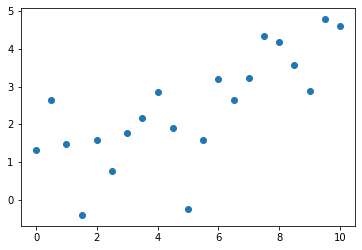

In [6]:
raw_inputs = np.linspace(0,10,21)
x = []
y = []
for val in raw_inputs:
    x.append(val)
    y.append(0.5*val + np.random.randn())
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y);

In [17]:
from sklearn.linear_model import LinearRegression #import the regression called "LinearRegression"

ModuleNotFoundError: No module named 'sklearn'

In [19]:
lr = LinearRegression() # Initialize the model

In [20]:
lr.fit(x,y) # "Fit" the model, which means "I want you to learn from my data!"

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
new_x = np.array([7,8,9]).reshape(-1,1)
predicted_y = lr.predict(new_x) # Predict for new data!
print(predicted_y)

[[3.89596632]
 [4.50165096]
 [5.10733559]]


In [30]:
predictors = pd.read_csv('../data/predictors_master.csv')
predictors.head()

,date_time,trade_price_open,trade_price_close,volume,symbol
0,5/13/2019 9:30,2827.25,2832.75,20983,ESM9 Index
1,5/13/2019 9:31,2832.5,2833.25,14798,ESM9 Index
2,5/13/2019 9:32,2833.25,2830,13015,ESM9 Index
3,5/13/2019 9:33,2830,2831.25,13216,ESM9 Index
4,5/13/2019 9:34,2831.25,2833.75,10634,ESM9 Index


In [31]:
dependents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577665 entries, 0 to 577664
Data columns (total 7 columns):
date_time            577665 non-null object
trade_price_open     577665 non-null object
trade_price_close    577665 non-null object
volume               577665 non-null object
symbol               577665 non-null object
predictor            18381 non-null object
industry             13088 non-null object
dtypes: object(7)
memory usage: 30.9+ MB


In [33]:
dependents.describe()

,date_time,trade_price_open,trade_price_close,volume,symbol,predictor,industry
count,577665,577665,577665,577665,577665,18381,13088
unique,12279,61438,61055,56037,134,4,5
top,5/17/19 15:59,8.04,1.65,100,TEVA US Equity,VGM8 Index,Autos
freq,85,612,599,54967,5486,9867,5338


In [34]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148853 entries, 0 to 148852
Data columns (total 5 columns):
date_time            148853 non-null object
trade_price_open     148853 non-null object
trade_price_close    148853 non-null object
volume               148853 non-null object
symbol               148853 non-null object
dtypes: object(5)
memory usage: 5.7+ MB


In [35]:
predictors.describe()

,date_time,trade_price_open,trade_price_close,volume,symbol
count,148853,148853,148853,148853,148853
unique,39209,5338,5446,16223,12
top,5/23/2019 12:21,1.1165,1.1165,0,GBPUSD Curncy
freq,6,564,564,41658,20790
